# House Prices Prediction

predict housing prices based on various features using different models, and the performance of the models is compared to identify the most effective approach for price prediction.

## Install & Import Required Dependencies

* **Pandas**
* **Numpy**
* **Scikit-learn**
* **Matplotlib**
* **Seaborn**
* **Requests**



In [ ]:
!pip install -r requirements.txt

In [163]:
import pickle
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import requests

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as mse

## Reading The Data
The housing price dataset provides a comprehensive collection of property listings, encompassing various attributes such as the number of bedrooms, bathrooms, living area size, lot size, and location details. This dataset is invaluable for a wide range of data analysis and machine learning applications. For instance, it can be utilized in predictive modeling to forecast property prices based on features such as location, amenities, and condition. Additionally, it can aid in identifying trends and patterns in the real estate market, assisting investors, real estate agents, and policymakers in making informed decisions. Moreover, the dataset can serve as a foundation for developing recommendation systems for homebuyers, guiding them towards properties that align with their preferences and requirements. Overall, the housing price dataset offers a wealth of insights and opportunities for leveraging data-driven approaches to understand and navigate the housing market effectively.

In [ ]:
filepath = "data/housing.csv"

housing_df = pd.read_csv(filepath_or_buffer=filepath)

## Exploratory Data Analysis (EDA)

- Explore the data size.
- Explore the data types & check if there is an empty values.
- Analyze the data by visulize it's features.
- Analyze the correlation between the features.

In [ ]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
housing_df.shape

(21613, 21)

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
housing_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

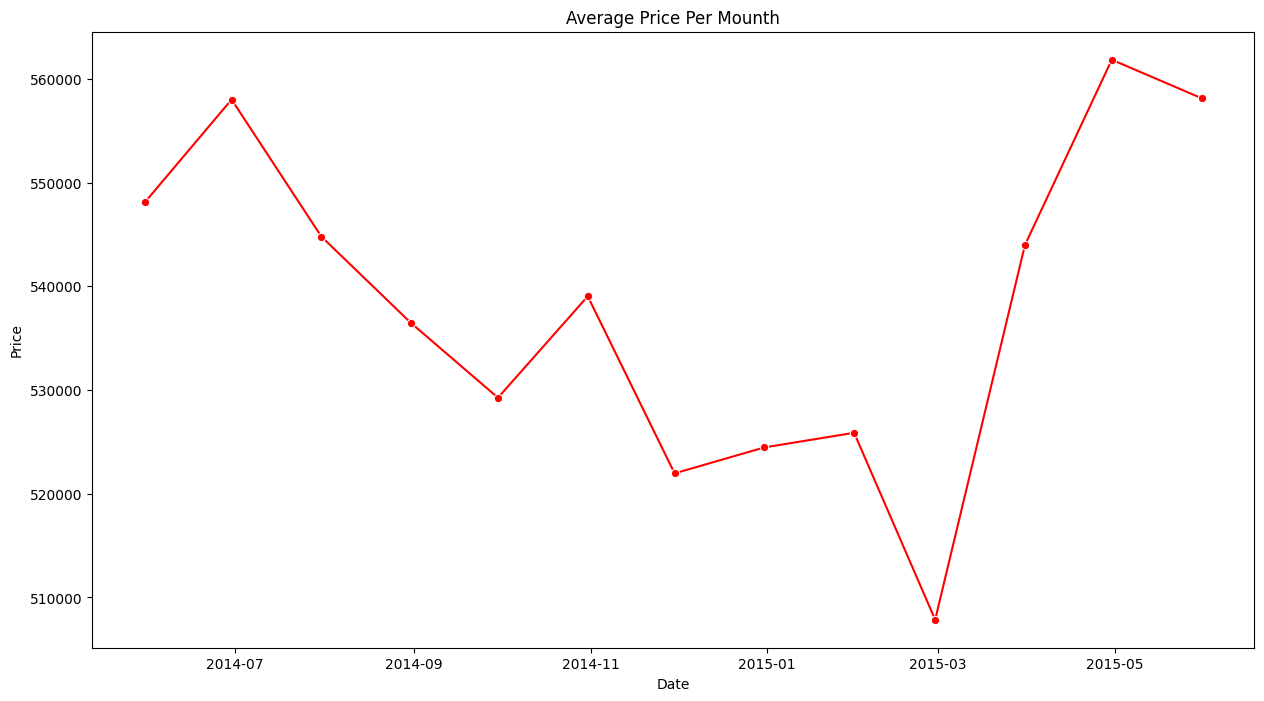

In [ ]:
housing_df["date"] = pd.to_datetime(housing_df["date"])

resampled_df = housing_df.resample("M", on="date").mean().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(x="date", y="price", data=resampled_df, marker="o", color="red")

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Average Price Per Mounth")

plt.show()

In [ ]:
date_range = str(housing_df["date"].dt.date.min()) + " to " + str(housing_df["date"].dt.date.max())

date_range

'2014-05-02 to 2015-05-27'

<Axes: >

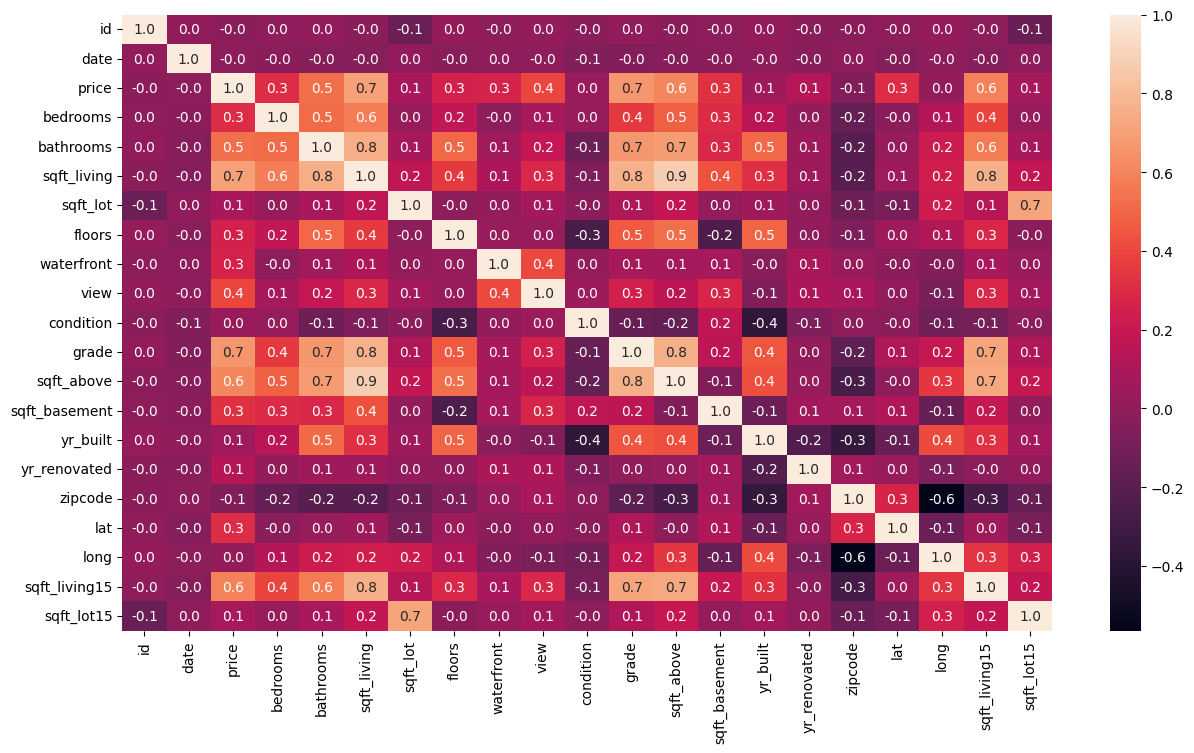

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(housing_df.corr(), annot=True, fmt=".1f")

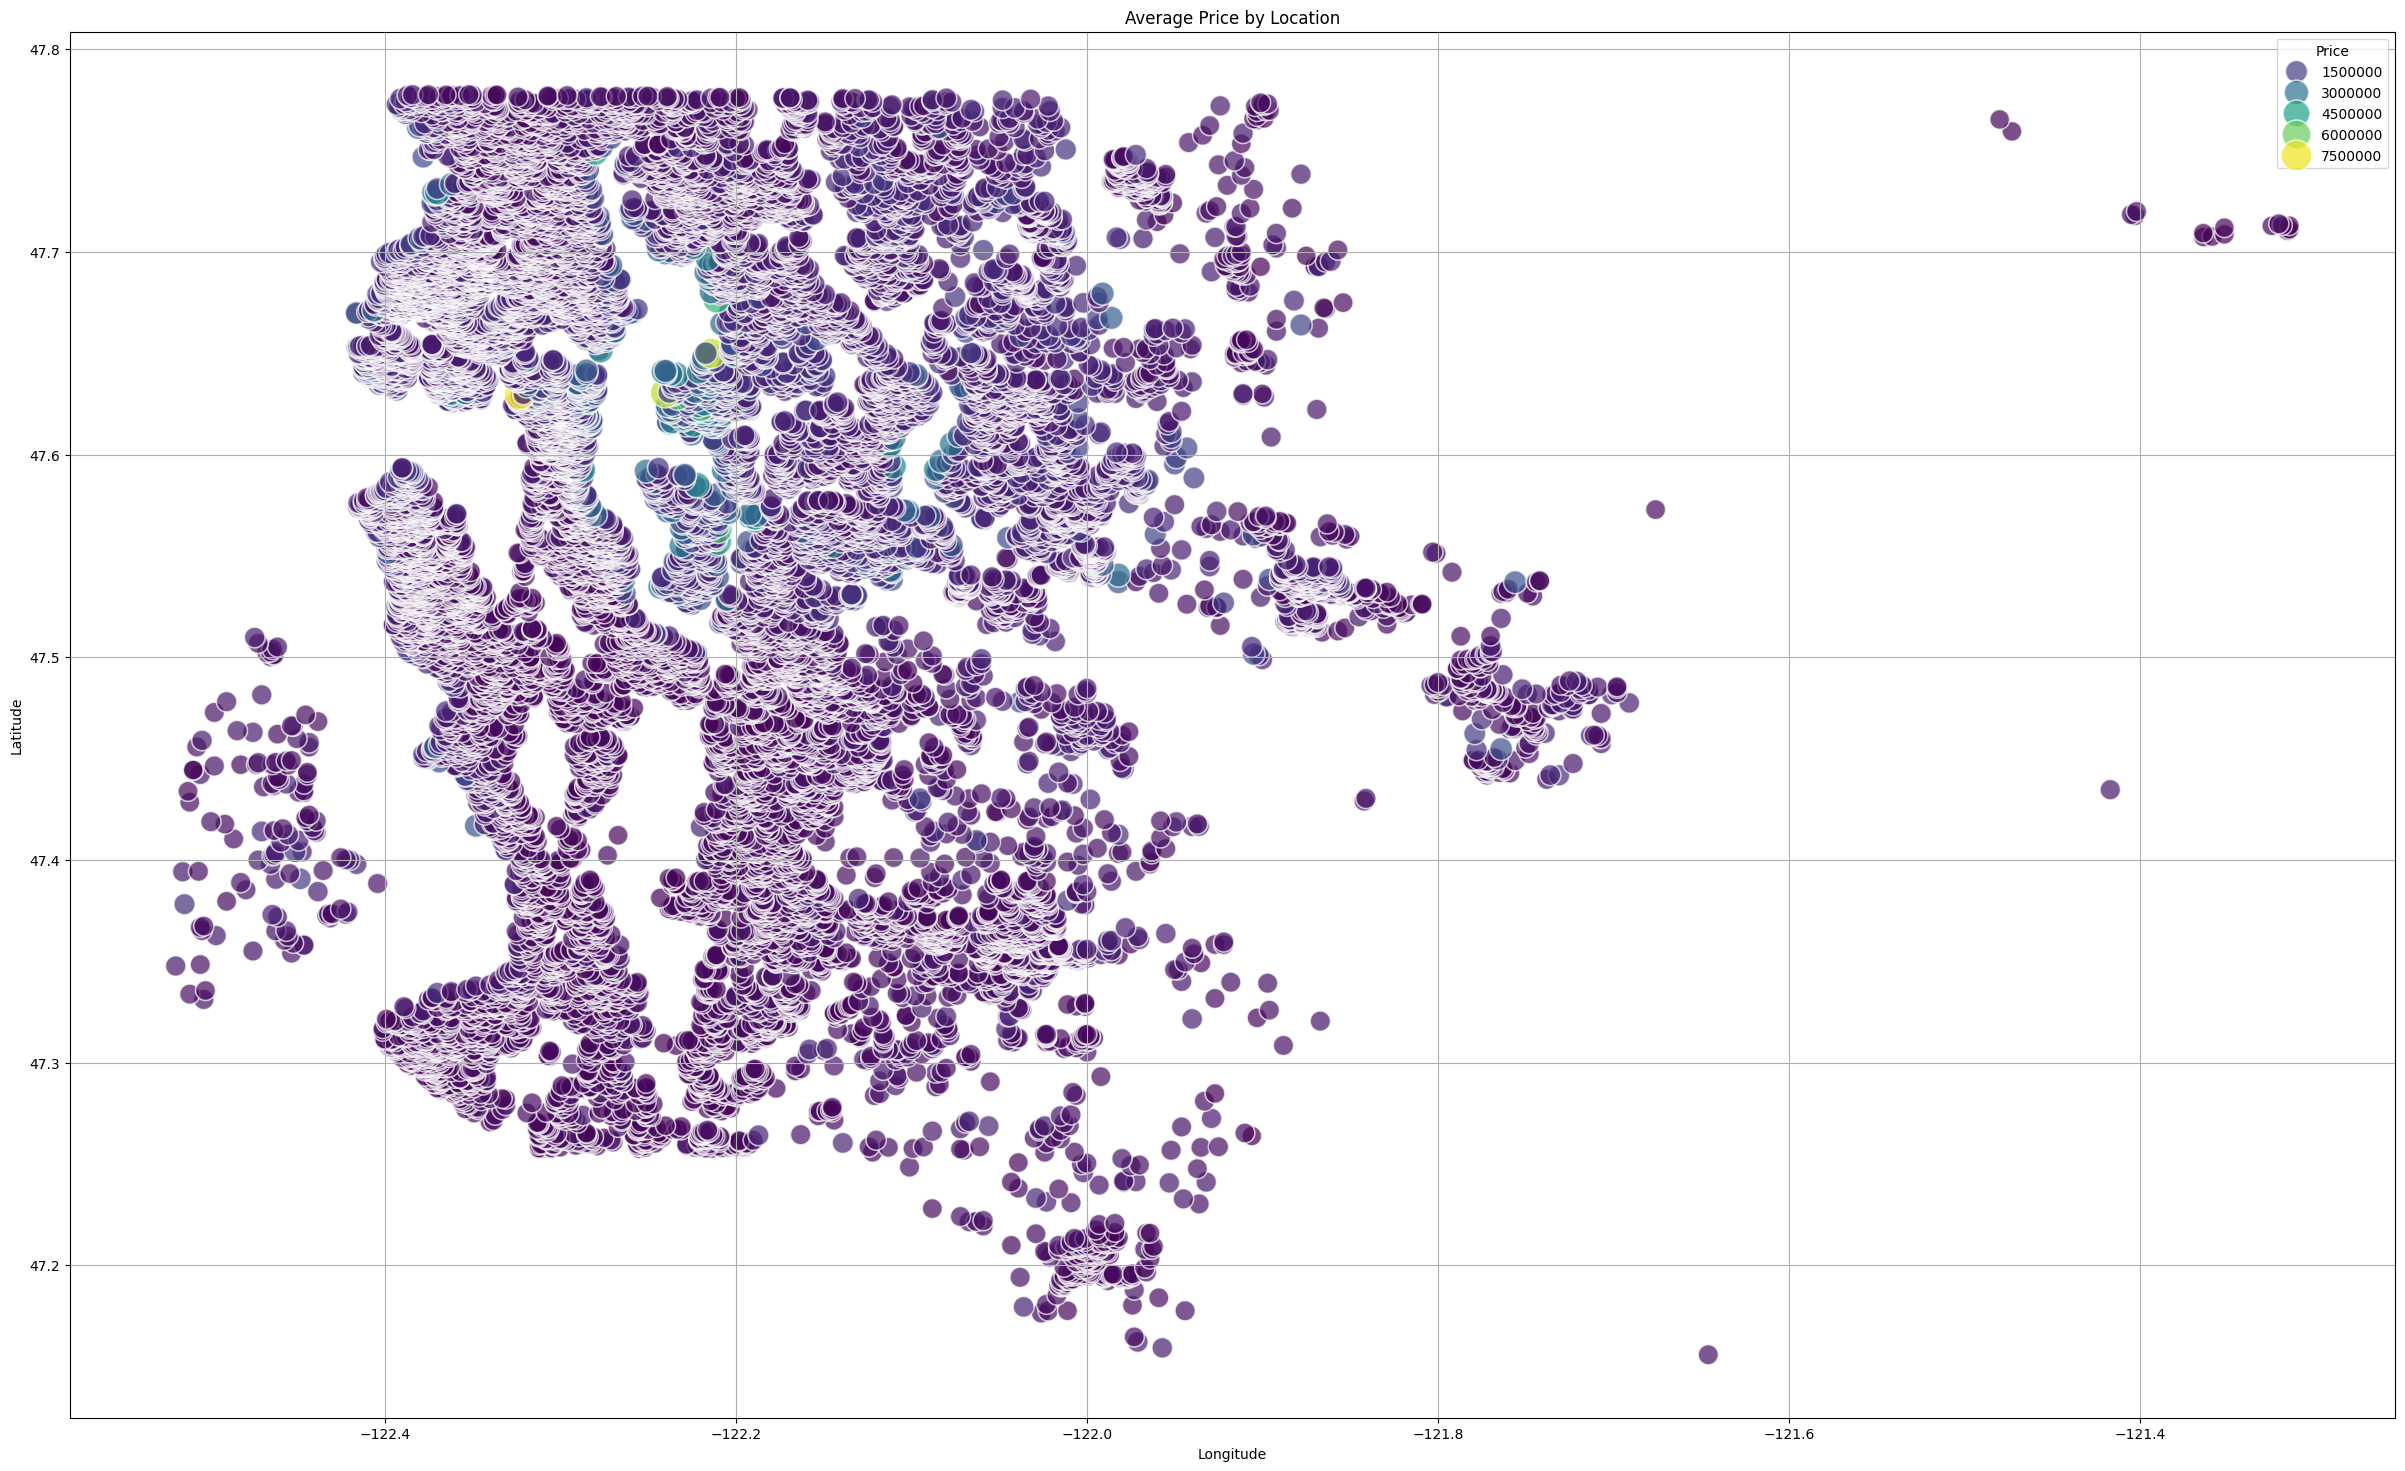

In [ ]:
grouped = housing_df.groupby(["lat", "long"])["price"].mean().reset_index()

plt.figure(figsize=(30, 18))
sns.scatterplot(x="long", y="lat", size="price", hue="price", sizes=(200, 500), palette="viridis", alpha=0.7, data=grouped)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Average Price by Location")
plt.grid(True)
plt.legend(title="Price", loc="upper right")
plt.show()

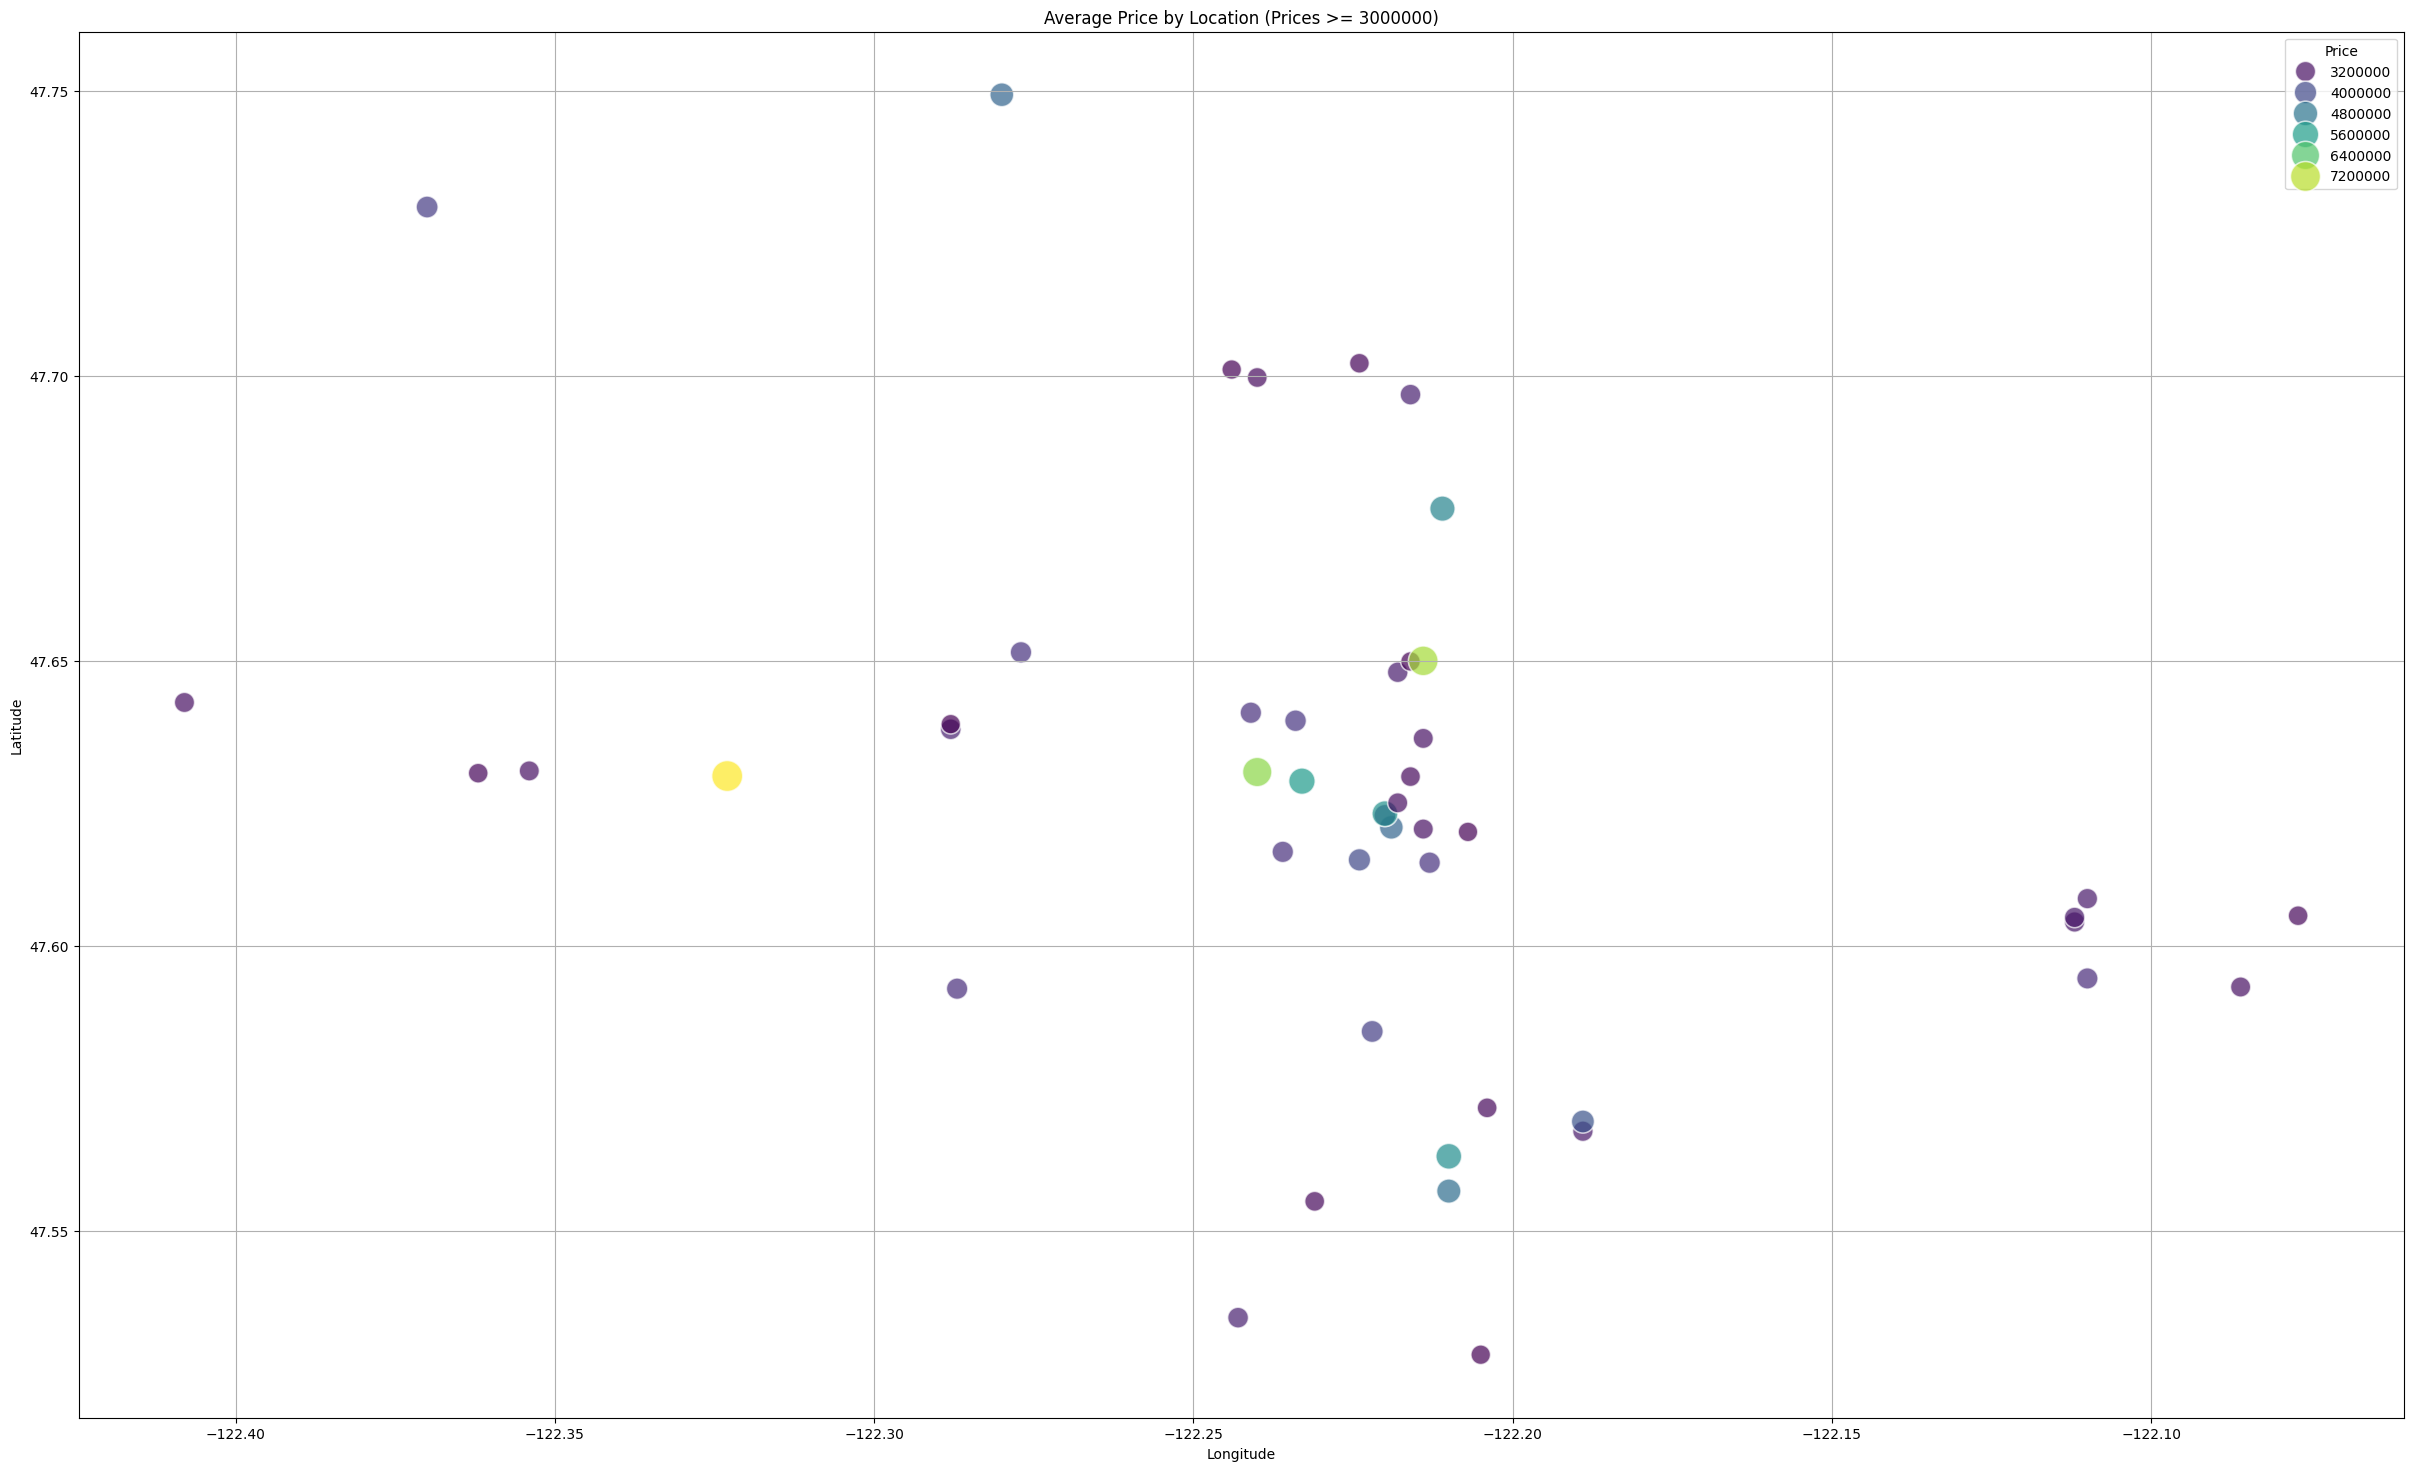

In [ ]:
grouped_filtered = grouped[grouped["price"] >= 3000000]

plt.figure(figsize=(30, 18))
sns.scatterplot(x="long", y="lat", size="price", hue="price", sizes=(200, 500), palette="viridis", alpha=0.7, data=grouped_filtered)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Average Price by Location (Prices >= 3000000)")
plt.grid(True)
plt.legend(title="Price", loc="upper right")
plt.show()

## Data Preprocessing


- Convert `lat` & `long` coordinates to `city` using **LocationIQ** API
- Replace the `Unknown` city to the nearest city using **NearestNeighbors**, according to `lat` & `long` coordinates.
- Removing unnecessary features.
- Detecting & handling outliers.
- Encoding categorical features.
- Split the train set into `inputs` & `outputs`, after that spliting it into `train` & `test` sets.
- Ensure the data is ready for training & evaluation.

### Convert `lat` & `long` coordinates to `city` using **LocationIQ** API

In [ ]:
key = "YOUR_LOCATIONIQ_API_KEY"

def get_city(lat: float, lon: float) -> str:
    """
    Getting the city name according to the latitude and longitude coordinates.

    :param lat: the latitude point as float
    :param lon: the longitude point as a float
    :return: the city name as a string
    """
    url = f"https://us1.locationiq.com/v1/reverse.php?key={key}&lat={lat}&lon={lon}&format=json"

    response = requests.get(url)

    if response.status_code == 200:

        data = response.json()
        address = data.get("address", {})
        city = address.get("city", "Unknown")

        return city


housing_df["city"] = housing_df.apply(lambda record: get_city(record["lat"], record["long"]), axis=1)

housing_df["city"].head(10)

0         Seattle
1         Seattle
2         Kenmore
3         Seattle
4            None
5         Redmond
6     Federal Way
7            None
8         Seattle
9    Maple Valley
Name: city, dtype: object

In [ ]:
housing_df["city"].value_counts()

city
Seattle                    1696
Renton                      308
Bellevue                    300
Kent                        266
Auburn                      214
Redmond                     208
Kirkland                    199
Sammamish                   170
Federal Way                 166
Issaquah                    156
Maple Valley                120
Burien                      116
Woodinville                  97
Des Moines                   72
Snoqualmie                   68
Mercer Island                57
Kenmore                      53
Enumclaw                     52
Duvall                       49
North Bend                   41
Bothell                      41
Vashon                       34
Seatac                       27
Black Diamond                20
Carnation                    19
Fall City                    11
Unknown                       9
Ravensdale                    6
Medina                        6
Pacific                       4
Fairwood                      4
New

In [ ]:
housing_df[housing_df["city"].isna()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,None
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,None
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0,0,...,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,None
13,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,None
20,6300500875,2014-05-14,385000.0,4,1.75,1620,4980,1.0,0,0,...,860,760,1947,0,98133,47.7025,-122.341,1400,4980,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,None
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,None
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,None
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,None


### Replace the `Unknown` city to the nearest city using **NearestNeighbors**, according to `lat` & `long` coordinates

In [ ]:
unknown_or_none_city = (housing_df["city"] == "Unknown") | (housing_df["city"].isna())
known_city = ~unknown_or_none_city

housing_df["lat_rad"] = np.radians(housing_df["lat"])
housing_df["long_rad"] = np.radians(housing_df["long"])

coordinates_known = housing_df.loc[known_city, ["lat_rad", "long_rad"]].to_numpy()
coordinates_unknown = housing_df.loc[unknown_or_none_city, ["lat_rad", "long_rad"]].to_numpy()

nbrs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree", metric="haversine").fit(coordinates_known)

distances, nearest_indices = nbrs.kneighbors(coordinates_unknown)

housing_df.loc[unknown_or_none_city, "city"] = housing_df.loc[known_city, "city"].values[nearest_indices.flatten()]

housing_df.drop(columns=["lat_rad", "long_rad"], inplace=True)

housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,7229300521,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,Seattle
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,Seattle
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,Seattle
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,Issaquah


In [ ]:
housing_df["city"].value_counts()

city
Seattle                    7955
Renton                     1542
Bellevue                   1427
Kent                       1202
Kirkland                    975
Redmond                     964
Auburn                      887
Sammamish                   804
Federal Way                 749
Issaquah                    725
Maple Valley                593
Burien                      574
Woodinville                 468
Snoqualmie                  318
Kenmore                     288
Des Moines                  282
Mercer Island               282
Enumclaw                    234
North Bend                  217
Duvall                      184
Bothell                     171
Seatac                      133
Vashon                      118
Carnation                   105
Black Diamond                71
Fall City                    63
Pacific                      42
Medina                       41
Fairwood                     34
Ravensdale                   31
Tukwila                      14
Pre

<ipython-input-51-b1a570116306>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="city", y="price", data=housing_df, estimator=np.mean, ci=None, color="darkred")


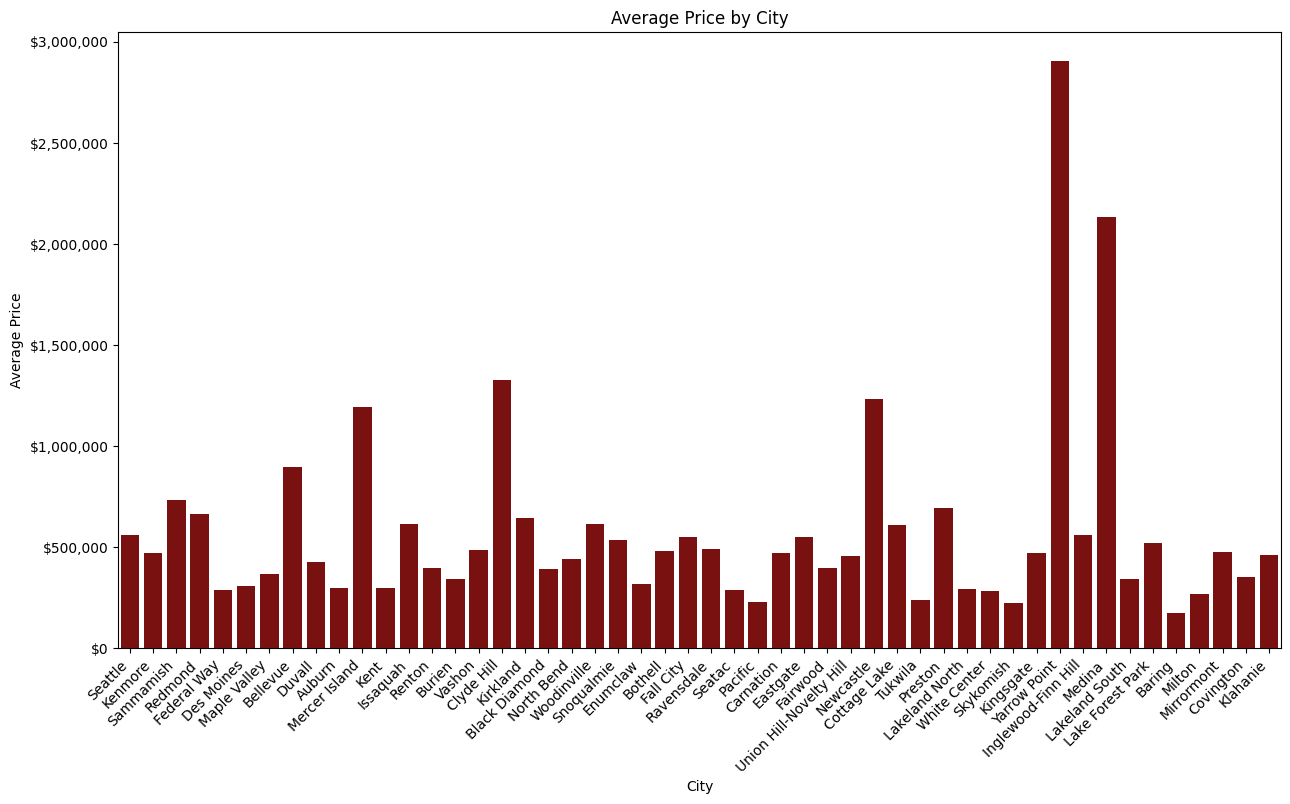

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x="city", y="price", data=housing_df, estimator=np.mean, ci=None, color="darkred")

plt.xlabel("City")
plt.ylabel("Average Price")
plt.title("Average Price by City")

plt.xticks(rotation=45, ha="right")

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x:,.0f}"))

plt.show()

In [ ]:
housing_df[housing_df["city"]=="Yarrow Point"]["price"]

2899     3000000.0
3229     1901000.0
3914     7062500.0
8539     1208000.0
12424     899000.0
20460    3345000.0
Name: price, dtype: float64

In [ ]:
filepath = "data/housing_with_city.csv"

housing_df.to_csv(path_or_buf=filepath, index=False)

In [118]:
filepath = "data/housing_with_city.csv"

housing_df = pd.read_csv(filepath_or_buffer=filepath)

### Remove the unnecessary features

In [119]:
unnecessary_columns = ["id", "date", "lat", "zipcode", "long"]

housing_df.drop(columns=unnecessary_columns, inplace=True)

housing_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,Seattle
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,Seattle
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,Kenmore
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,Seattle
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,Sammamish


### Detect the outliers using **IQR** & Handle them using **KNN**


In [120]:
numerical_features = housing_df.select_dtypes(include=["float64", "int64"]).columns

outlier_indices = set()

for feature in numerical_features:
    Q1 = housing_df[feature].quantile(0.25)
    Q3 = housing_df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_condition = (housing_df[feature] < lower_bound) | (housing_df[feature] > upper_bound)

    outlier_indices.update(housing_df[outlier_condition].index)

outlier_indices = list(outlier_indices)

housing_df.loc[outlier_indices, numerical_features] = np.nan

imputer = KNNImputer(n_neighbors=3)

housing_df[numerical_features] = imputer.fit_transform(housing_df[numerical_features])

housing_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,city
0,231300.000000,2.000000,1.000000,1180.000000,5650.000000,1.000000,0.0,0.0,3.000000,7.000000,1180.000000,0.000000,1955.00000,0.0,1340.000000,5650.00000,Seattle
1,437798.913012,3.261562,1.972115,1813.719727,7018.010616,1.471137,0.0,0.0,3.418751,7.379471,1586.095216,227.624511,1971.82682,0.0,1796.264415,6898.49081,Seattle
2,180000.000000,2.000000,1.000000,770.000000,10000.000000,1.000000,0.0,0.0,3.000000,6.000000,770.000000,0.000000,1933.00000,0.0,2720.000000,8062.00000,Kenmore
3,604000.000000,4.000000,3.000000,1960.000000,5000.000000,1.000000,0.0,0.0,5.000000,7.000000,1050.000000,910.000000,1965.00000,0.0,1360.000000,5000.00000,Seattle
4,510000.000000,3.000000,2.000000,1680.000000,8080.000000,1.000000,0.0,0.0,3.000000,8.000000,1680.000000,0.000000,1987.00000,0.0,1800.000000,7503.00000,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.000000,3.000000,2.500000,1530.000000,1131.000000,3.000000,0.0,0.0,3.000000,8.000000,1530.000000,0.000000,2009.00000,0.0,1530.000000,1509.00000,Seattle
21609,400000.000000,4.000000,2.500000,2310.000000,5813.000000,2.000000,0.0,0.0,3.000000,8.000000,2310.000000,0.000000,2014.00000,0.0,1830.000000,7200.00000,Seattle
21610,402101.000000,2.000000,0.750000,1020.000000,1350.000000,2.000000,0.0,0.0,3.000000,7.000000,1020.000000,0.000000,2009.00000,0.0,1020.000000,2007.00000,Seattle
21611,400000.000000,3.000000,2.500000,1600.000000,2388.000000,2.000000,0.0,0.0,3.000000,8.000000,1600.000000,0.000000,2004.00000,0.0,1410.000000,1287.00000,Issaquah


### Encode the categorical features using **One-Hot Encoding**

In [121]:
housing_df_encoded = pd.get_dummies(data=housing_df, columns=["city"])

housing_df_encoded.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,city_Seatac,city_Seattle,city_Skykomish,city_Snoqualmie,city_Tukwila,city_Union Hill-Novelty Hill,city_Vashon,city_White Center,city_Woodinville,city_Yarrow Point
0,231300.000000,2.000000,1.000000,1180.000000,5650.000000,1.000000,0.0,0.0,3.000000,7.000000,...,False,True,False,False,False,False,False,False,False,False
1,437798.913012,3.261562,1.972115,1813.719727,7018.010616,1.471137,0.0,0.0,3.418751,7.379471,...,False,True,False,False,False,False,False,False,False,False
2,180000.000000,2.000000,1.000000,770.000000,10000.000000,1.000000,0.0,0.0,3.000000,6.000000,...,False,False,False,False,False,False,False,False,False,False
3,604000.000000,4.000000,3.000000,1960.000000,5000.000000,1.000000,0.0,0.0,5.000000,7.000000,...,False,True,False,False,False,False,False,False,False,False
4,510000.000000,3.000000,2.000000,1680.000000,8080.000000,1.000000,0.0,0.0,3.000000,8.000000,...,False,False,False,False,False,False,False,False,False,False


In [122]:
housing_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 66 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         21613 non-null  float64
 1   bedrooms                      21613 non-null  float64
 2   bathrooms                     21613 non-null  float64
 3   sqft_living                   21613 non-null  float64
 4   sqft_lot                      21613 non-null  float64
 5   floors                        21613 non-null  float64
 6   waterfront                    21613 non-null  float64
 7   view                          21613 non-null  float64
 8   condition                     21613 non-null  float64
 9   grade                         21613 non-null  float64
 10  sqft_above                    21613 non-null  float64
 11  sqft_basement                 21613 non-null  float64
 12  yr_built                      21613 non-null  float64
 13  y

In [139]:
filepath = "data/train.csv"

housing_df_encoded.to_csv(path_or_buf=filepath, index=False)

### Split the train set into `inputs` & `outputs`, after that spliting it into `train` & `test` sets

In [140]:
filepath = "data/train.csv"

train = pd.read_csv(filepath_or_buffer=filepath)

train_in, train_out = train.drop(columns=["price"]), train["price"]

train_in, test_in, train_out, test_out = train_test_split(train_in, train_out, test_size=0.2, random_state=42, shuffle=True)

In [124]:
train_in.dtypes.value_counts(), test_in.dtypes.value_counts()

(bool       50
 float64    15
 Name: count, dtype: int64,
 bool       50
 float64    15
 Name: count, dtype: int64)

In [125]:
train_in.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.0,17290.0,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.0,17290.000000,17290.000000
mean,3.261314,1.972426,1812.394886,7005.771498,1.474344,0.0,0.0,3.417843,7.378268,1586.075716,226.319170,1971.879205,0.0,1794.125851,6887.899954
std,0.646811,0.539832,512.979304,2818.249667,0.460525,0.0,0.0,0.540998,0.668825,500.042339,294.362869,24.489012,0.0,422.428903,2507.930867
min,2.000000,0.750000,560.000000,520.000000,1.000000,0.0,0.0,2.000000,6.000000,490.000000,0.000000,1900.000000,0.0,620.000000,651.000000
25%,3.000000,1.750000,1510.000000,5512.750000,1.000000,0.0,0.0,3.000000,7.000000,1270.000000,0.000000,1962.000000,0.0,1540.000000,5580.750000
50%,3.261562,1.972115,1813.719727,7018.010616,1.471137,0.0,0.0,3.418751,7.379471,1586.095216,227.624511,1971.826820,0.0,1796.264415,6898.490810
75%,3.261562,2.500000,1990.000000,8000.000000,2.000000,0.0,0.0,3.418751,8.000000,1670.000000,227.624511,1987.000000,0.0,1900.000000,7984.000000
max,5.000000,3.500000,4170.000000,19141.000000,3.500000,0.0,0.0,5.000000,9.000000,3720.000000,1400.000000,2015.000000,0.0,3630.000000,17550.000000


In [126]:
train_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17290 entries, 6325 to 15795
Data columns (total 65 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedrooms                      17290 non-null  float64
 1   bathrooms                     17290 non-null  float64
 2   sqft_living                   17290 non-null  float64
 3   sqft_lot                      17290 non-null  float64
 4   floors                        17290 non-null  float64
 5   waterfront                    17290 non-null  float64
 6   view                          17290 non-null  float64
 7   condition                     17290 non-null  float64
 8   grade                         17290 non-null  float64
 9   sqft_above                    17290 non-null  float64
 10  sqft_basement                 17290 non-null  float64
 11  yr_built                      17290 non-null  float64
 12  yr_renovated                  17290 non-null  float64
 13  sqf

## Definding & Training & Evaluating The Models

Here, I will use four regression models:

1. Linear Regression
2. Lasso Regression (L1 regularization)
3. Ridge Regression (L2 regularization)
4. Random Forest Regression

### Linear Regression

In [127]:
reg = Pipeline([("scaler", StandardScaler()), ("regressor", LinearRegression())])

reg.fit(X=train_in, y=train_out)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

### Lasso Regression (L1)

In [128]:
lasso = Pipeline([("scaler", StandardScaler()), ("regressor", Lasso(max_iter=50000))])

lasso.fit(X=train_in, y=train_out)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', Lasso(max_iter=50000))])

### Ridge Regression (L2)

In [129]:
ridge = Pipeline([("scaler", StandardScaler()), ("regressor", Ridge(max_iter=50000, solver="sag"))])

ridge.fit(X=train_in, y=train_out)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', Ridge(max_iter=50000, solver='sag'))])

### Random Forest Regression

In [130]:
forest = Pipeline([("scaler", StandardScaler()), ("regressor", RandomForestRegressor())])

forest.fit(X=train_in, y=train_out)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])

### Evaluate the models performance using the Root Mean Square Error `RMSE` loss function, and `R^2` score

In [138]:
reg_pred = reg.predict(test_in)
lasso_pred = lasso.predict(test_in)
ridge_pred = ridge.predict(test_in)
forest_pred = forest.predict(test_in)

reg_rmse = np.sqrt(mse(y_true=test_out, y_pred=reg_pred))
lasso_rmse = np.sqrt(mse(y_true=test_out, y_pred=lasso_pred))
ridge_rmse = np.sqrt(mse(y_true=test_out, y_pred=ridge_pred))
forest_rmse = np.sqrt(mse(y_true=test_out, y_pred=forest_pred))

reg_train_r2 = reg.score(train_in, train_out)
lasso_train_r2 = lasso.score(train_in, train_out)
ridge_train_r2 = ridge.score(train_in, train_out)
forest_train_r2 = forest.score(train_in, train_out)

reg_test_r2 = reg.score(test_in, test_out)
lasso_test_r2 = lasso.score(test_in, test_out)
ridge_test_r2 = ridge.score(test_in, test_out)
forest_test_r2 = forest.score(test_in, test_out)

loss_values = [("Linear Regression", reg_rmse, reg_train_r2, reg_test_r2),
               ("Lasso", lasso_rmse, lasso_train_r2, lasso_test_r2),
               ("Ridge", ridge_rmse,ridge_train_r2, ridge_test_r2),
               ("Random Forest", forest_rmse, forest_train_r2, forest_test_r2)]


loss_df = pd.DataFrame(data=loss_values, columns=["Model", "Loss(RMSE)", "R2(Train)", "R2(Test)"])

loss_df.style.hide(axis="index")

Model,Loss(RMSE),R2(Train),R2(Test)
Linear Regression,88395.563136,0.648351,0.648457
Lasso,88375.159594,0.648480,0.648619
Ridge,88374.580949,0.648480,0.648624
Random Forest,70601.996372,0.965910,0.775740


### Save the models to a `.pkl` files







In [167]:
models = {"reg": reg, "lasso": lasso, "ridge": ridge, "forest": forest}

os.makedirs("models", exist_ok=True)

for model_name, model in models.items():
    file_path = os.path.join("models", f"{model_name}.pkl")

    with open(file_path, mode="wb") as file:
        pickle.dump(model, file)

    print(f"Model '{model_name}' saved to '{file_path}'")

Model 'reg' saved to '/models1/reg.pkl'
Model 'lasso' saved to '/models1/lasso.pkl'
Model 'ridge' saved to '/models1/ridge.pkl'
Model 'forest' saved to '/models1/forest.pkl'


### Load the `forest` model to make predictions

In [162]:
with open(file="models/forest.pkl",mode="rb") as file:
    loaded_forest = pickle.load(file)

test = test_in.sample(5)
actual = test_out.loc[test.index].values

prediction = loaded_forest.predict(test)

act_vs_pred = pd.DataFrame({"Prediction": prediction, "Actual": actual, "Difference": np.abs(prediction - actual)})

act_vs_pred.style.hide(axis="index")

Prediction,Actual,Difference
529466.500000,569900.000000,40433.500000
312828.940000,287500.000000,25328.940000
437798.913012,437798.913012,0.000000
323198.950000,346000.000000,22801.050000
490979.300000,506000.000000,15020.700000
